In [105]:
import pandas as pd

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for a nicer color palette

# Set a seaborn style
sns.set(style="whitegrid")

# Deep, muted, and bright are good choices for a color palette
colors = sns.color_palette("deep")

In [107]:
lasso_cv_coefs = pd.read_csv('models/coefs/bma_coefs.csv', index_col=0)
rf_coefs = pd.read_csv('models/rf_features.csv', index_col=0)

In [108]:
rf_features = rf_coefs.iloc[30:].index
regression_features = lasso_cv_coefs[lasso_cv_coefs['x'] != 0].index[1:]

In [109]:
data = pd.read_pickle('datasets/final_dataset_2023-12-18.pkl')
data[['jan-sep', 'oct-dec']] = data[['jan-sep', 'oct-dec']].astype(int)

In [110]:
data_cut = data.loc[:, 'month':]

In [111]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [112]:
pca = PCA()
scaler = StandardScaler()

data_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(data_cut)), index=data.index, columns=[f'pca_{i}' for i in range(data_cut.shape[1])])

In [113]:
import plotly.express as px

fig = px.scatter_3d(data_pca, x='pca_0', y='pca_1', z='pca_5', color=data['cpi_pct'])

fig.update_layout(coloraxis_colorbar=dict(title="cpi_pct"))
fig.update_layout(width=1200, height=900)
fig.show()

In [114]:
data_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_186,pca_187,pca_188,pca_189,pca_190,pca_191,pca_192,pca_193,pca_194,pca_195
1970-12-01,6.178578,2.429788,0.414214,1.571569,1.257746,-2.326385,1.469096,-1.326181,0.247202,2.464039,...,-0.003122,-0.011190,0.001056,0.007928,0.009415,0.011238,-0.003249,-0.002607,-0.003551,-1.809026e-14
1971-01-01,6.175210,2.148268,0.571064,1.556264,1.604806,-1.936718,1.608219,-1.345566,0.280917,2.457070,...,-0.009261,0.004609,-0.001826,-0.004572,-0.010501,-0.004343,-0.001622,0.002069,0.003710,3.692587e-14
1971-02-01,6.301238,1.715731,2.309644,2.749105,1.205216,0.268650,1.737050,-0.496325,1.718536,1.771865,...,0.010306,0.021997,0.001084,0.002838,-0.000827,-0.009142,0.001580,-0.004088,-0.000145,-1.067978e-14
1971-03-01,6.467622,1.246998,2.155950,1.597996,1.061909,-0.013641,2.705126,-0.383075,1.508070,1.358086,...,0.007400,0.000187,-0.000063,-0.001678,0.004341,0.009556,0.010452,0.001701,0.002362,-9.374330e-16
1971-04-01,6.555537,2.173154,2.179343,1.280905,1.436711,-0.720065,3.444720,-0.684728,0.951423,2.443156,...,0.006422,-0.005860,0.004017,-0.005190,-0.000395,-0.003868,-0.004194,-0.003210,-0.001798,-3.357117e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-8.305348,1.886449,-6.272368,1.649094,-5.827373,-3.759872,3.540120,-3.150604,5.332390,2.180424,...,0.002040,-0.008885,0.000109,-0.006102,0.001782,-0.001555,0.005251,0.000339,-0.003351,1.939267e-16
2023-09-01,-8.110600,3.070601,-6.695908,3.181355,-5.399805,-3.096428,3.392482,-3.497269,6.286041,0.146588,...,-0.004895,0.005961,-0.006184,0.012224,0.001887,-0.001220,-0.002627,-0.003065,0.001780,-4.646480e-17
2023-10-01,-7.915159,-1.182781,-1.268632,3.466141,-5.727102,-4.965713,-1.655796,0.108131,6.719531,0.998248,...,-0.003152,0.008027,0.003929,-0.005195,-0.005347,-0.000342,0.000370,-0.000552,0.000938,-2.288804e-16
2023-11-01,-7.566613,-0.690015,-3.178769,-1.961686,-4.487082,-7.222923,-0.077993,1.046218,3.909049,2.256345,...,-0.000572,-0.005457,-0.005729,-0.004818,0.002124,-0.000062,-0.005654,0.000987,0.000356,-4.029573e-16


In [115]:
import plotly.express as px

fig = px.scatter(x=data.index, y=data['cpi_pct'], color=data['cpi_pct'])

fig.update_layout(coloraxis_colorbar=dict(title="cpi_pct"))
fig.update_layout(width=1200, height=900)
fig.show()

c:\Users\jkage\miniconda3\envs\uni\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [173]:
k = 2

gmm = GaussianMixture(n_components=k)

data_cut['gmm_class'] = gmm.fit_predict(data_cut[regression_features])

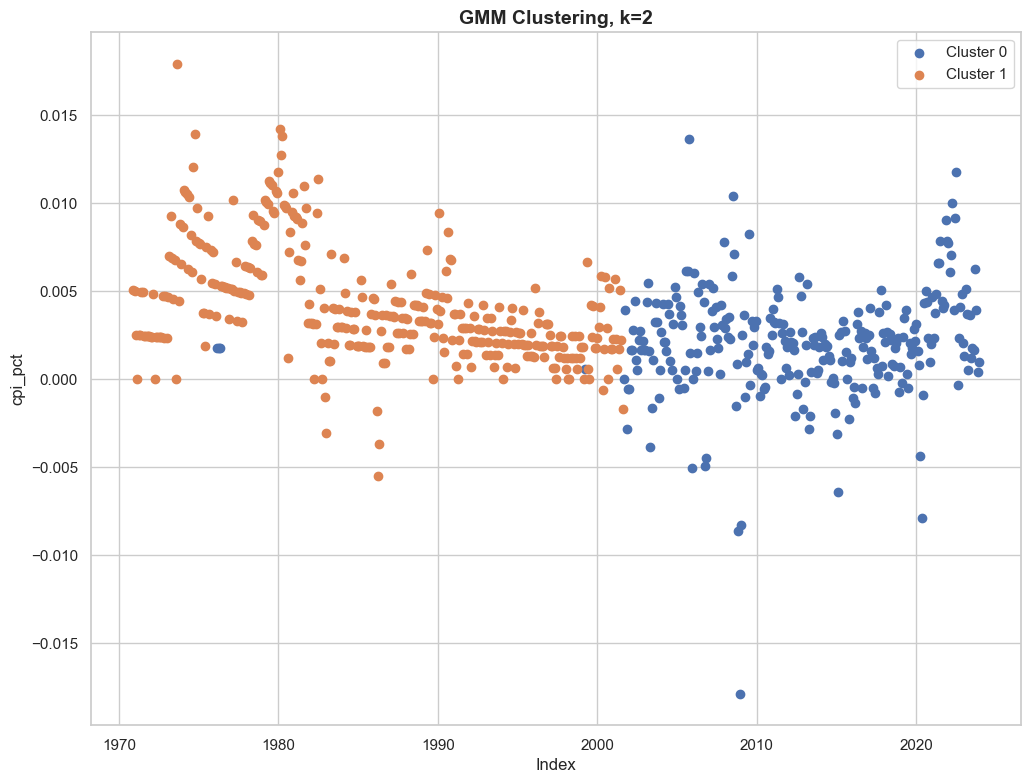

In [174]:
# Set a seaborn style
sns.set(style="whitegrid")

# Deep, muted, and bright are good choices for a color palette
colors = sns.color_palette("deep")

# Set a seaborn style
sns.set(style="whitegrid")

# Deep, muted, and bright are good choices for a color palette
colors = sns.color_palette("deep")

# Create a scatter plot
plt.figure(figsize=(12, 9))
for class_value, color in zip(data_cut['gmm_class'].sort_values().unique(), colors):
    class_data = data[data_cut['gmm_class'] == class_value]
    plt.scatter(class_data.index, class_data['cpi_pct'], label=f'Cluster {class_value}', color=color)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('cpi_pct')
plt.title(f'GMM Clustering, k={k}', fontsize=14, fontweight='bold')

# Add legend
plt.legend()

# Show the plot
plt.savefig(f'plots/gmm_clustering_k{k}.png', dpi=400)

In [ ]:
import plotly.express as px

fig = px.scatter(x=data.index, y=data['cpi_pct'], color=data_cut['gmm_class'])

fig.update_layout(coloraxis_colorbar=dict(title="cpi_pct"))
fig.update_layout(width=1200, height=900)
fig.show()

c:\Users\jkage\miniconda3\envs\uni\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



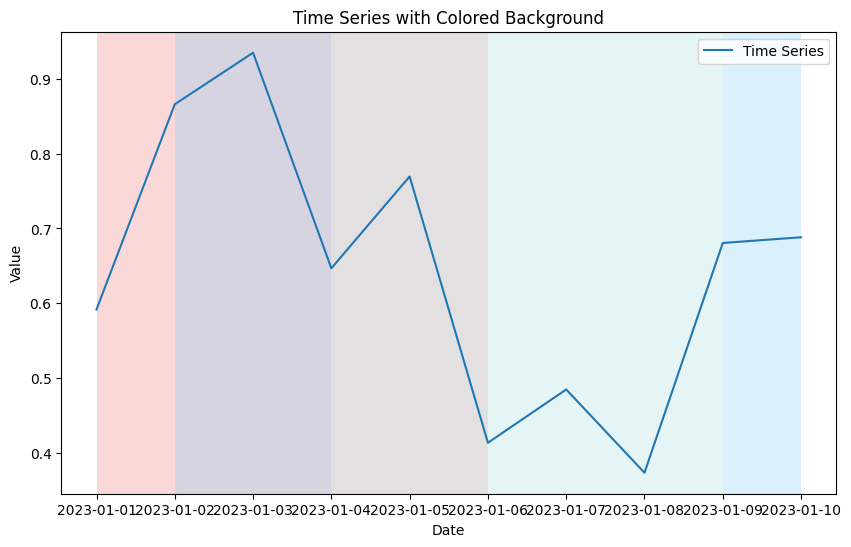

In [ ]:
21ewrwer34124
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
data = np.random.rand(len(date_rng))
classes = np.random.randint(0, 5, len(date_rng))

df = pd.DataFrame({'Date': date_rng, 'Value': data, 'Class': classes})

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time series
ax.plot(df['Date'], df['Value'], label='Time Series')

# Define the color mapping for each class
class_colors = {0: 'lightcoral', 1: 'lightskyblue', 2: 'lightgreen', 3: 'lightyellow', 4: 'lightpink'}

# Add colored background regions for each class
for class_id, color in class_colors.items():
    class_indices = df.index[df['Class'] == class_id]
    for i in range(len(class_indices) - 1):
        ax.axvspan(df['Date'].iloc[class_indices[i]], df['Date'].iloc[class_indices[i + 1]], facecolor=color, alpha=0.3)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series with Colored Background')

# Add legend
ax.legend()

# Show the plot
plt.show()
plt.show()